In [2]:
%load_ext rpy2.ipython

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%%R
#Install packages 
install.packages("tseries", dependencies = TRUE)
install.packages("astsa")
install.packages("forecast")
install.packages("tidyverse")
install.packages("readxl")
install.packages("nortest")
install.packages("car")
install.packages("ggfortify")
install.packages("quadprog", dependencies = TRUE)
install.packages("installr")
install.packages("aTSA")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/xts_0.12.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 517875 bytes (505 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R

In [8]:
%%R
### Cargar Librerias
library(tseries)
library(astsa)
library(forecast)
library(tidyverse)


library(readxl)
library(nortest)
library(ggfortify)
library(aTSA)


R[write to console]: Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

R[write to console]: 
    ‘tseries’ version: 0.10-50

    ‘tseries’ is a package for time series analysis and computational
    finance.

    See ‘library(help="tseries")’ for details.


R[write to console]: 
Attaching package: ‘forecast’


R[write to console]: The following object is masked from ‘package:astsa’:

    gas


R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: Registered S3 methods overwritten by 'ggfortify':
  method                 from    


In [9]:
%%R
### Cargar los datos 

datos <- read_excel("/content/drive/MyDrive/Semestre 8 2022-2/Data.xlsx", sheet = "Sugar")


New names:
• `` -> `...3`
• `` -> `...4`


In [10]:
%%R
#Convertir datos a series de tiempo 

SSugar = ts(datos$Prices, start = c(2017,4), frequency = 12)
SSugar

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
2017                      0.1974 0.1893 0.1820 0.1866 0.1911 0.2018 0.1935
2018 0.1707 0.1643 0.1721 0.1629 0.1589 0.1751 0.1610 0.1444 0.1545 0.1472
2019 0.1173 0.1189 0.1080 0.1037 0.1067 0.1528 0.1445 0.1343 0.1276 0.1232
2020 0.1155 0.1261 0.1155 0.1276 0.1284 0.1335 0.1303 0.1230 0.1280 0.1387
2021 0.1108 0.1199 0.1166 0.1174 0.1289 0.1336 0.1308 0.1376 0.1537 0.1408
2022 0.1410 0.1346 0.1603 0.1633                                          
        Nov    Dec
2017 0.1918 0.2017
2018 0.1277 0.1283
2019 0.1100 0.1147
2020 0.1052 0.1018
2021 0.1431 0.1341
2022              


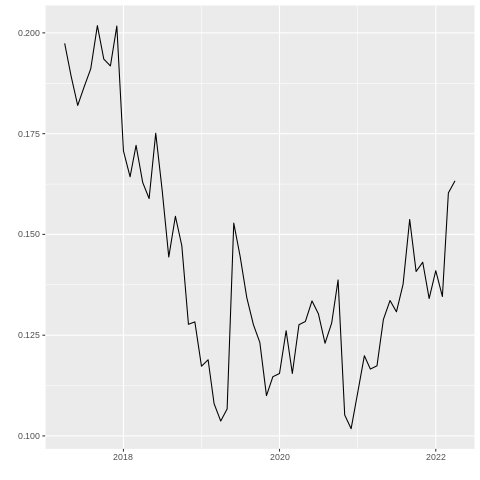

In [ ]:
%%R
autoplot(SSugar)


In [ ]:
%%R
#Podemos buscar convertirla a una serie viable (con ruido blanco)
serie1Log = log(SSugar)
autoplot(serie1Log)  
stationary.test(serie1Log) #Prueba no paramÃ©triva Dickey-Fuller --> Misma funcionalidad que ADF.test
#pvalue = 0.01 <  a la significancia 0.5


Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 0.0613   0.658
[2,]   1 0.0585   0.657
[3,]   2 0.1309   0.678
[4,]   3 0.1791   0.692
Type 2: with drift no trend 
     lag   ADF p.value
[1,]   0 -2.28   0.222
[2,]   1 -2.08   0.299
[3,]   2 -1.83   0.395
[4,]   3 -1.85   0.384
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -1.87   0.623
[2,]   1 -1.56   0.748
[3,]   2 -1.15   0.907
[4,]   3 -1.06   0.922
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


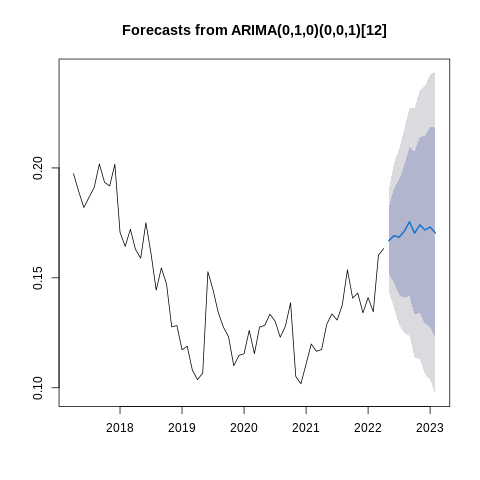

In [ ]:
%%R
#Modelo en automático 
mod = auto.arima(SSugar) #r genera el modelo de manera automatic
mod

#Paso 7. Pronostics
pronostico = forecast::forecast(mod,h=10)
pronostico
plot(pronostico)

In [6]:
%%R
datosCoffe <- read_excel("/content/drive/MyDrive/Semestre 8 2022-2/Data.xlsx", sheet = "Coffee")


R[write to console]: Error in read_excel("/content/drive/MyDrive/Semestre 8 2022-2/Data.xlsx",  : 
  could not find function "read_excel"




Error in read_excel("/content/drive/MyDrive/Semestre 8 2022-2/Data.xlsx",  : 
  could not find function "read_excel"


RInterpreterError: ignored

In [13]:
%%R
#Convertir datos a series de tiempo 

SCoffee = ts(datosCoffe$Prices, start = c(2017,4), frequency = 12)
SCoffee

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
2017                      2.2130 2.2005 2.4600 2.3960 2.3475 2.2895 2.0160
2018 1.5640 1.4990 1.5280 1.2985 1.2995 1.2930 1.2735 1.2525 1.2320 1.0605
2019 1.0230 0.9460 1.0775 1.1605 1.0830 1.0655 1.1215 1.3320 1.0920 0.9570
2020 1.0860 0.9430 0.8900 0.9290 0.9685 0.9720 1.0495 0.9940 1.1235 1.2205
2021 1.0815 1.1445 1.1800 1.1490 1.1935 1.1970 1.2110 1.2190 1.2380 1.2430
2022 1.3490 1.2355 1.2965 1.3430                                          
        Nov    Dec
2017 1.8640 1.7970
2018 1.1350 1.1930
2019 1.0035 0.9285
2020 0.9585 1.0120
2021 1.4035 1.2805
2022              


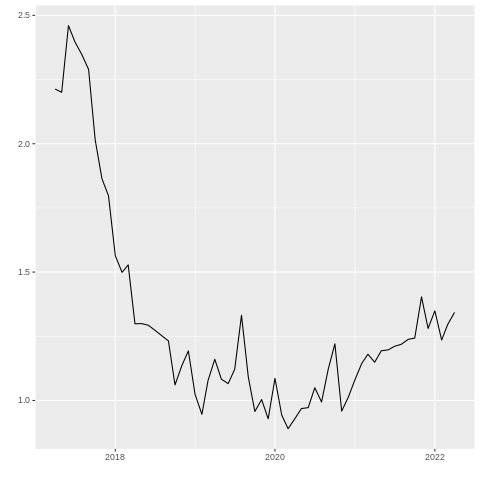

In [ ]:
%%R
autoplot(SCoffee)


In [14]:
%%R
#Podemos buscar convertirla a una serie viable (con ruido blanco)
serie2Log = log(SCoffee)
autoplot(serie2Log)  
stationary.test(serie2Log) #Prueba no paramÃ©triva Dickey-Fuller --> Misma funcionalidad que ADF.test
#pvalue = 0.01 <  a la significancia 0.5

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag   ADF p.value
[1,]   0 -2.18  0.0306
[2,]   1 -2.30  0.0231
[3,]   2 -3.14  0.0100
[4,]   3 -3.27  0.0100
Type 2: with drift no trend 
     lag   ADF p.value
[1,]   0 -2.24  0.2368
[2,]   1 -2.28  0.2231
[3,]   2 -2.98  0.0451
[4,]   3 -3.22  0.0251
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -1.56   0.751
[2,]   1 -1.37   0.828
[3,]   2 -1.57   0.747
[4,]   3 -1.85   0.629
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


In [5]:
%%R
#Modelo en automático 
mod2 = auto.arima(SCoffee) #r genera el modelo de manera automatic
mod2

#Paso 7. Pronostics
pronostico2 = forecast::forecast(mod2,h=9)
pronostico2

#plot(pronostico2)

R[write to console]: Error in auto.arima(SCoffee) : could not find function "auto.arima"

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In install.packages("car") :
R[write to console]: 
 
R[write to console]:  installation of package ‘nloptr’ had non-zero exit status

R[write to console]: 2: 
R[write to console]: In install.packages("car") :
R[write to console]: 
 
R[write to console]:  installation of package ‘lme4’ had non-zero exit status

R[write to console]: 3: 
R[write to console]: In install.packages("car") :
R[write to console]: 
 
R[write to console]:  installation of package ‘pbkrtest’ had non-zero exit status

R[write to console]: 4: 
R[write to console]: In install.packages("car") :
R[write to console]: 
 
R[write to console]:  installation of package ‘car’ had non-zero exit status




Error in auto.arima(SCoffee) : could not find function "auto.arima"


RInterpreterError: ignored